In [1]:
###1 SCRAPING TWITTER DATA WITH SNSCRAPE MODUL
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Membuat list untuk menampung data twitter
tweets_list2 = []

# Scraping menggunakan TwitterSearchScraper
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Samsung Flip lang:id since:2021-07-01 until:2021-07-20').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Membuat dataframe dari list data twitter
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2021-07-19 16:24:01+00:00,1417158294754447371,Samsung promo Z flip 4k woii 🙂,NanaaaEddy
1,2021-07-19 15:49:10+00:00,1417149523390914562,19 juli 2021\npake waktu fokus samsung enakeun...,bilasukabelajar
2,2021-07-19 15:19:10+00:00,1417141976118431746,Samsung Galaxy Z Flip 3 Adidas Sport Edition👟#...,SmartUpdateYT
3,2021-07-19 13:57:52+00:00,1417121516123082764,@samsungID @hanxx2525 @smslhdytllh_18 Samsung ...,nvayta13
4,2021-07-19 10:13:10+00:00,1417064964817313792,#New #firmware #Samsung Galaxy Z Flip #SM_F700...,mobik_top
...,...,...,...,...
207,2021-07-01 10:58:59+00:00,1410553517241036807,@lalalisiaa @kiri13194720 @AREAJULID Bukan nok...,HarleyAmiiiinn
208,2021-07-01 08:08:01+00:00,1410510489130463233,@tatyjoee nak buat mcm mana... saya mampu sams...,maknae_taja
209,2021-07-01 07:46:11+00:00,1410504995368230913,"Samsung Galaxy Z Flip 3 Design, Specs Tipped i...",tripurateer
210,2021-07-01 02:53:24+00:00,1410431312339607552,"RT gizbot ""Samsung Galaxy Z Flip 3 renders lea...",ChhetriVivek


In [2]:
#Menyimpan hasil scrap ke dalam file csv
tweets_df2.to_csv('Samsung.csv')

In [3]:
###2. ANALISIS NAIVE BAYES
#Import libraries
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF
from sklearn.feature_extraction.text import CountVectorizer #Count Vectorizer

In [4]:
#membaca data csv twitter samsung
samsung_twt = pd.read_csv("TWITTER FINAL DATA.csv")
samsung_twt.head()

#Membuat dataframe twitter samsung
df_samsung_twt = pd.DataFrame(samsung_twt)
df_samsung_twt

,No,Datetime,Tweet Id,Text,Username,Sentiment
0,1,2021-07-01 06:49:53+00:00,1.410000e+18,@ismailfahmi @hafidz_alfath Bagaimana dengan S...,aul_88,0
1,2,2021-07-01 07:21:59+00:00,1.410000e+18,di sinilah samsung punya keunggulan wkwkwk,faizkrisnadi,1
2,3,2021-07-01 07:44:43+00:00,1.410000e+18,"@zenrs bukan solusi atas kelangkaan sih, tp se...",raitsuqa,0
3,4,2021-07-01 10:12:22+00:00,1.410000e+18,"@dhaniahmadsd @gadgething Kalo pribadi, suka f...",nvillraa,-1
4,5,2021-07-02 02:41:49+00:00,1.410000e+18,@collegemenfess Kalo hpnya samsung adatuh fitu...,Ixoracoccineaa,0
...,...,...,...,...,...,...
678,679,2021-09-30 20:00:23+00:00,1.440000e+18,font android hanya untuk Samsung Galaxy Series,nigiashop,0
679,680,2021-09-30 18:44:30+00:00,1.440000e+18,"@veraagustian_ Samsung juga sama mas, baterain...",AlbertSolo2,-1
680,681,2021-09-30 18:20:18+00:00,1.440000e+18,samsung gajelas banget lu suka tiba-tiba memor...,desnki,-1
681,682,2021-09-30 17:41:10+00:00,1.440000e+18,Samsung Galaxy A22 dan A32 Sudah Bisa Terkonek...,Rubrik_Id,0


In [5]:
##DATA PRE-PROCESSING
#Data cleansing

#menghilangkan "(<.*?>)" 
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: re.sub('(<.*?>)', ' ', x))

#menghilangkan tanda baca 
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))

#menghilangkan whitespace
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: x.strip())

#menghilangkan string yang tidak memiliki huruf
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: re.sub('[^a-zA-Z"]',' ', x))

#konversi ke huruf kecil 
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: x.lower())

In [6]:
df_samsung_twt['Text']

0       ismailfahmi  hafidz alfath bagaimana dengan s...
1             di sinilah samsung punya keunggulan wkwkwk
2       zenrs bukan solusi atas kelangkaan sih tp see...
3       dhaniahmadsd  gadgething kalo pribadi suka fi...
4       collegemenfess kalo hpnya samsung adatuh fitu...
                             ...                        
678       font android hanya untuk samsung galaxy series
679     veraagustian  samsung juga sama mas baterainy...
680    samsung gajelas banget lu suka tiba tiba memor...
681    samsung galaxy a   dan a   sudah bisa terkonek...
682    coba cek kamera samsung kalian kok samsung gal...
Name: Text, Length: 683, dtype: object

In [7]:
#Melakukan stemming dengan lemmatizer
import nltk

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_samsung_twt['Text']=df_samsung_twt['Text'].apply(lambda x: lemmatizer.lemmatize(x))

df_samsung_twt['Text']

[nltk_data] Downloading package wordnet to C:\Users\Devita
[nltk_data]     Suprapto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       ismailfahmi  hafidz alfath bagaimana dengan s...
1             di sinilah samsung punya keunggulan wkwkwk
2       zenrs bukan solusi atas kelangkaan sih tp see...
3       dhaniahmadsd  gadgething kalo pribadi suka fi...
4       collegemenfess kalo hpnya samsung adatuh fitu...
                             ...                        
678       font android hanya untuk samsung galaxy series
679     veraagustian  samsung juga sama mas baterainy...
680    samsung gajelas banget lu suka tiba tiba memor...
681    samsung galaxy a   dan a   sudah bisa terkonek...
682    coba cek kamera samsung kalian kok samsung gal...
Name: Text, Length: 683, dtype: object

In [8]:
#Melakukan tokenisasi
df_samsung_twt['Text'] = df_samsung_twt['Text'].apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split()))

In [9]:
##DATA PROCESSING
#pembagian data training dan data testing 85:15
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_samsung_twt['Text'], df_samsung_twt['Sentiment'], test_size = 0.15, random_state =7)
print("Data training tweet: ", x_train.shape)
print("Data testing tweet: ", x_test.shape)
print("Data training sentimen: ", y_train.shape)
print("Data testing sentimen: ",y_test.shape)

Data training tweet:  (580,)
Data testing tweet:  (103,)
Data training sentimen:  (580,)
Data testing sentimen:  (103,)


In [10]:
#Vektorisasi dengan Count Vectorizer
cv = CountVectorizer()
vector_x_train = cv.fit_transform(x_train)
vector_x_test = cv.transform(x_test)

In [11]:
#Melakukan klasifikasi dengan naive bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vector_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
y_pred  =  classifier.predict(vector_x_test.toarray())
y_pred

array([ 1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,
        0,  1,  1,  1,  1,  1,  0, -1,  0,  1,  1,  1,  1,  1,  1,  1,  0,
       -1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1], dtype=int64)

In [13]:
#membuat dataframe untuk melihat hasil prediksi dengan lebih jelas
df_prediksi = pd.DataFrame({'Actual': y_test,'Prediction': y_pred})
df_prediksi.tail()

,Actual,Prediction
553,-1,-1
179,1,1
528,1,1
394,1,1
570,1,1


In [14]:
#Menampilkan akurasi
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7766990291262136

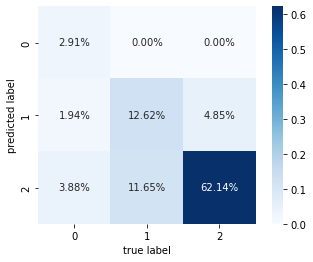

In [15]:
#Menampilkan hasil evaluasi model dengan confusion matrix dan angka berupa presentase
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T/np.sum(mat.T), square = True, annot = True, fmt = '.2%', cbar = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [16]:
###3. ANALISIS REGRESI LINEAR
#import libraries
import pandas as pd
import numpy as np

In [17]:
#Membaca csv dan mengambil harga CLOSE, HIGH, VOLUME, dan DATE

dataset_saham = pd.read_csv('SAHAM SAMSUNG.csv')
df_dataset_saham = pd.DataFrame(dataset_saham[['Date', 'Open' ,'Close', 'High', 'Low', 'Volume']]) 
df_dataset_saham.head()

,Date,Open,Close,High,Low,Volume
0,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882
1,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097
2,2021-07-05,80100.0,80400.0,80800.0,80000.0,8330969
3,2021-07-06,80600.0,81200.0,81200.0,80500.0,12131651
4,2021-07-07,81200.0,80800.0,81300.0,80300.0,15992202


In [18]:
#Menampilkan info tentang data
df_dataset_saham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    62 non-null     object 
 1   Open    62 non-null     float64
 2   Close   62 non-null     float64
 3   High    62 non-null     float64
 4   Low     62 non-null     float64
 5   Volume  62 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [19]:
#Mengambil data sentiment yang akan digabung dengan data saham

df_samsung_twt

,No,Datetime,Tweet Id,Text,Username,Sentiment
0,1,2021-07-01 06:49:53+00:00,1.410000e+18,ismailfahmi hafidz alfath bagaimana dengan sam...,aul_88,0
1,2,2021-07-01 07:21:59+00:00,1.410000e+18,di sinilah samsung punya keunggulan wkwkwk,faizkrisnadi,1
2,3,2021-07-01 07:44:43+00:00,1.410000e+18,zenrs bukan solusi atas kelangkaan sih tp seen...,raitsuqa,0
3,4,2021-07-01 10:12:22+00:00,1.410000e+18,dhaniahmadsd gadgething kalo pribadi suka fitu...,nvillraa,-1
4,5,2021-07-02 02:41:49+00:00,1.410000e+18,collegemenfess kalo hpnya samsung adatuh fitur...,Ixoracoccineaa,0
...,...,...,...,...,...,...
678,679,2021-09-30 20:00:23+00:00,1.440000e+18,font android hanya untuk samsung galaxy series,nigiashop,0
679,680,2021-09-30 18:44:30+00:00,1.440000e+18,veraagustian samsung juga sama ma baterainya g...,AlbertSolo2,-1
680,681,2021-09-30 18:20:18+00:00,1.440000e+18,samsung gajelas banget lu suka tiba tiba memor...,desnki,-1
681,682,2021-09-30 17:41:10+00:00,1.440000e+18,samsung galaxy a dan a sudah bisa terkoneksi g,Rubrik_Id,0


In [20]:
#Konversi Datetime menjadi Date saja
df_samsung_twt['Date'] = pd.to_datetime(df_samsung_twt['Datetime']).dt.date

In [21]:
#Konversi sentiment angka menjadi kata 'positive', 'negative', dan 'netral'
df_samsung_twt['Sentiment_word']=df_samsung_twt['Sentiment'].apply( lambda x: 'positive' if x==1 else ( 'negative' if x==-1 else 'netral') )
df_samsung_twt

,No,Datetime,Tweet Id,Text,Username,Sentiment,Date,Sentiment_word
0,1,2021-07-01 06:49:53+00:00,1.410000e+18,ismailfahmi hafidz alfath bagaimana dengan sam...,aul_88,0,2021-07-01,netral
1,2,2021-07-01 07:21:59+00:00,1.410000e+18,di sinilah samsung punya keunggulan wkwkwk,faizkrisnadi,1,2021-07-01,positive
2,3,2021-07-01 07:44:43+00:00,1.410000e+18,zenrs bukan solusi atas kelangkaan sih tp seen...,raitsuqa,0,2021-07-01,netral
3,4,2021-07-01 10:12:22+00:00,1.410000e+18,dhaniahmadsd gadgething kalo pribadi suka fitu...,nvillraa,-1,2021-07-01,negative
4,5,2021-07-02 02:41:49+00:00,1.410000e+18,collegemenfess kalo hpnya samsung adatuh fitur...,Ixoracoccineaa,0,2021-07-02,netral
...,...,...,...,...,...,...,...,...
678,679,2021-09-30 20:00:23+00:00,1.440000e+18,font android hanya untuk samsung galaxy series,nigiashop,0,2021-09-30,netral
679,680,2021-09-30 18:44:30+00:00,1.440000e+18,veraagustian samsung juga sama ma baterainya g...,AlbertSolo2,-1,2021-09-30,negative
680,681,2021-09-30 18:20:18+00:00,1.440000e+18,samsung gajelas banget lu suka tiba tiba memor...,desnki,-1,2021-09-30,negative
681,682,2021-09-30 17:41:10+00:00,1.440000e+18,samsung galaxy a dan a sudah bisa terkoneksi g,Rubrik_Id,0,2021-09-30,netral


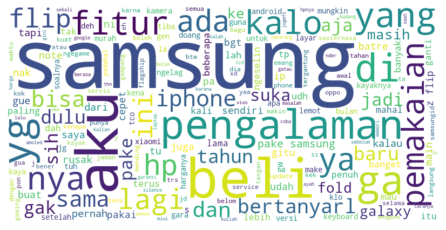

In [23]:
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud 

my_df= df_samsung_twt['Text'].loc[df_samsung_twt['Sentiment_word'] == 'negative']
wordcloud2 = WordCloud(background_color="white", width=800, height=400).generate(' '.join(my_df))

plt.axis("off")
#plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

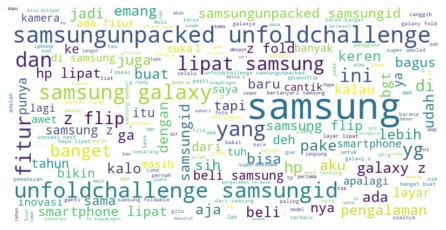

In [24]:
my_df= df_samsung_twt['Text'].loc[df_samsung_twt['Sentiment_word'] == 'positive']
wordcloud2 = WordCloud(background_color="white", width=800, height=400).generate(' '.join(my_df))

plt.axis("off")
#plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

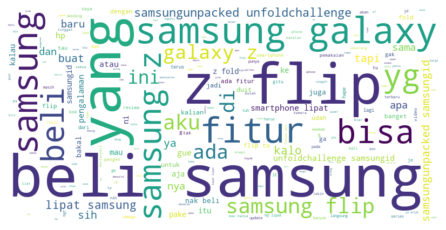

In [25]:
my_df= df_samsung_twt['Text'].loc[df_samsung_twt['Sentiment_word'] == 'netral']
wordcloud2 = WordCloud(background_color="white", width=800, height=400).generate(' '.join(my_df))

plt.axis("off")
#plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

In [27]:
#Menghitung jumlah sentimen per harinya
df_samsung_twt_count=df_samsung_twt.groupby(['Date', 'Sentiment_word']).size().reset_index(name="count")
df_samsung_twt_count

,Date,Sentiment_word,count
0,2021-07-01,negative,1
1,2021-07-01,netral,2
2,2021-07-01,positive,1
3,2021-07-02,negative,2
4,2021-07-02,netral,2
...,...,...,...
206,2021-09-29,netral,5
207,2021-09-29,positive,2
208,2021-09-30,negative,2
209,2021-09-30,netral,5


In [28]:
#OVERALL DATA
df_dataset_saham['Date'] = df_dataset_saham['Date'].astype('datetime64[ns]')
df_samsung_twt_count['Date'] = df_samsung_twt_count['Date'].astype('datetime64[ns]')

data_regresi=pd.merge(df_dataset_saham, df_samsung_twt_count, on='Date',how='outer')
data_regresi

,Date,Open,Close,High,Low,Volume,Sentiment_word,count
0,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,negative,1.0
1,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,netral,2.0
2,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,positive,1.0
3,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097.0,negative,2.0
4,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097.0,netral,2.0
...,...,...,...,...,...,...,...,...
207,2021-09-25,NaN,NaN,NaN,NaN,NaN,netral,3.0
208,2021-09-25,NaN,NaN,NaN,NaN,NaN,positive,1.0
209,2021-09-26,NaN,NaN,NaN,NaN,NaN,negative,2.0
210,2021-09-26,NaN,NaN,NaN,NaN,NaN,netral,4.0


In [29]:
data_regresi=data_regresi.dropna()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#SENTIMEN POSITIF
pos = data_regresi.loc[data_regresi['Sentiment_word'] == 'positive']
pos.head()

,Date,Open,Close,High,Low,Volume,Sentiment_word,count
2,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,positive,1.0
5,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097.0,positive,3.0
8,2021-07-05,80100.0,80400.0,80800.0,80000.0,8330969.0,positive,3.0
9,2021-07-06,80600.0,81200.0,81200.0,80500.0,12131651.0,positive,4.0
12,2021-07-07,81200.0,80800.0,81300.0,80300.0,15992202.0,positive,3.0


In [31]:
#SENTIMEN NEGATIF
neg = data_regresi.loc[data_regresi['Sentiment_word'] == 'negative']
neg.head()

,Date,Open,Close,High,Low,Volume,Sentiment_word,count
0,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,negative,1.0
3,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097.0,negative,2.0
6,2021-07-05,80100.0,80400.0,80800.0,80000.0,8330969.0,negative,1.0
10,2021-07-07,81200.0,80800.0,81300.0,80300.0,15992202.0,negative,1.0
13,2021-07-08,81100.0,79900.0,81200.0,79900.0,16660998.0,negative,1.0


In [32]:
#SENTIMEN NETRAL
net = data_regresi.loc[data_regresi['Sentiment_word'] == 'netral']
net.head()

,Date,Open,Close,High,Low,Volume,Sentiment_word,count
1,2021-07-01,80500.0,80100.0,80600.0,80000.0,13382882.0,netral,2.0
4,2021-07-02,80000.0,80000.0,80400.0,79900.0,8753097.0,netral,2.0
7,2021-07-05,80100.0,80400.0,80800.0,80000.0,8330969.0,netral,3.0
11,2021-07-07,81200.0,80800.0,81300.0,80300.0,15992202.0,netral,2.0
14,2021-07-08,81100.0,79900.0,81200.0,79900.0,16660998.0,netral,1.0


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#inline untuk menyimpan gambar atau visualisasi di Jupyter

pos_heatmap = pos.drop(['Date','Sentiment_word'], axis=1)
neg_heatmap = neg.drop(['Date','Sentiment_word'], axis=1)
net_heatmap = net.drop(['Date','Sentiment_word'], axis=1)

<AxesSubplot:title={'center':'Pearson Correlation Positive Sentiment'}>

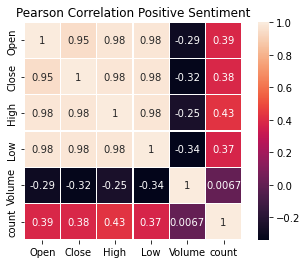

In [34]:
#HEATMAP

#sentimen positif
plt.title('Pearson Correlation Positive Sentiment')
sns.heatmap(pos_heatmap.astype(float).corr(), linewidths = 0.25, vmax = 1.0, square = True, annot = True)

<AxesSubplot:title={'center':'Pearson Correlation Negative Sentiment'}>

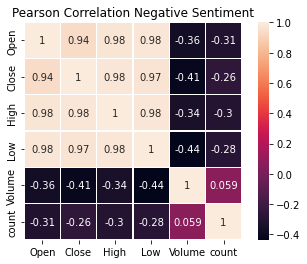

In [35]:
#HEATMAP
#sentimen negatif

plt.title('Pearson Correlation Negative Sentiment')
sns.heatmap(neg_heatmap.astype(float).corr(), linewidths = 0.25, vmax = 1.0, square = True, annot = True)

<AxesSubplot:title={'center':'Pearson Correlation Netral Sentiment'}>

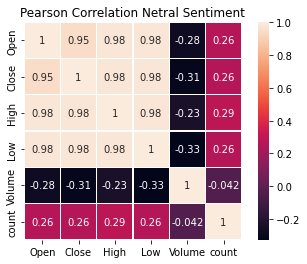

In [36]:
#HEATMAP
#sentimen netral

plt.title('Pearson Correlation Netral Sentiment')
sns.heatmap(net_heatmap.astype(float).corr(), linewidths = 0.25, vmax = 1.0, square = True, annot = True)

In [37]:
#REGRESI LINEAR SENTIMEN POSITIF DAN HARGA HIGH

x= pd.factorize(pos['count'])[0].reshape(-1, 1) #independent variabel
y= pd.factorize(pos['High'])[0].reshape(-1, 1) #dependent variabel

In [38]:
#algoritma linear regression
regressor = LinearRegression()
#regressor.fit(x_train, y_train)
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#lihat angka
print(regressor.intercept_)
print(regressor.coef_)

[21.45404638]
[[0.58665405]]


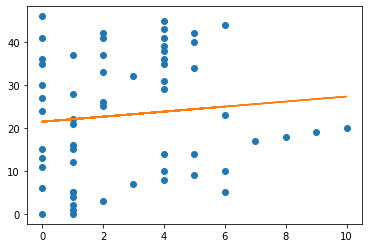

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = x.reshape(1, 59).flatten()
y = y.reshape(1, 59).flatten()

plt.plot(x,y,'o')

m,b = np.polyfit(x,y,1)

plt.plot(x, m*x+b)

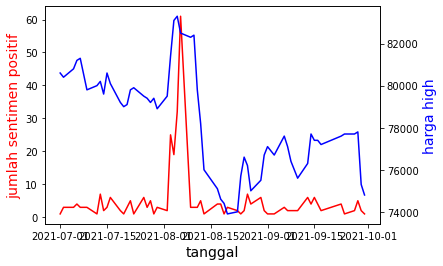

In [41]:
#membuat line graph untuk harga high dan sentimen positif
fig,ax = plt.subplots()

ax.plot(pos['Date'], pos['count'], color="red")
ax.set_xlabel("tanggal",fontsize=14)
ax.set_ylabel("jumlah sentimen positif",color="red",fontsize=14)

# y-axis kedua
ax2=ax.twinx()
ax2.plot(pos['Date'], pos['High'],color="blue")
ax2.set_ylabel("harga high",color="blue",fontsize=14)
plt.show()